In [1]:
import sinaps as sn

In [2]:
sec=list()
for i in range(2):
    sec.append(sn.Section(L=10,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV
    sec.append(sn.Section(L=100,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.8,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV

In [3]:
N=sn.Neuron()

N.add_section(sec[0],0,1)
N.add_section(sec[1],1,2)
N.add_section(sec[2],2,3)
N.add_section(sec[3],3,4)



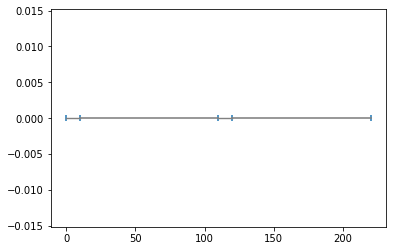

In [4]:
N.view.graph()

In [5]:
sec[0].add_channel_p(sn.channels.HeavysideCurrent(500,10,12),x = 0)

In [6]:
sec[0].add_channel_c(sn.channels.Hodgkin_Huxley())
sec[2].add_channel_c(sn.channels.Hodgkin_Huxley())

In [7]:
sec[1].add_channel_c(sn.channels.LeakChannel(0,2000))
sec[3].add_channel_c(sn.channels.LeakChannel(0,2000))

In [8]:
N

Neuron(["0-1: Section(name=139975834419832, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [<sinaps.channels.Hodgkin_Huxley object at 0x7f4ea6f45f28>], point_channels : ['0:<sinaps.channels.HeavysideCurrent object at 0x7f4ea6f45c88>'])", '1-2: Section(name=139975834420000, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])', '2-3: Section(name=139975834420056, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [<sinaps.channels.Hodgkin_Huxley object at 0x7f4ea6f45c18>], point_channels : [])', '3-4: Section(name=139975834420112, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])'])

In [14]:
sec[0].dx=0.1
sec[2].dx=0.1
sec[1].dx=1
sec[3].dx=1

In [9]:
sim=sn.Simulation(N,dx=10)

In [10]:
sim.N

Neuron(["0-1: Section(name=139975834419832, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [<sinaps.channels.Hodgkin_Huxley object at 0x7f4ea6f455c0>], point_channels : ['0:<sinaps.channels.HeavysideCurrent object at 0x7f4ea6f45dd8>'])", '1-2: Section(name=139975834420000, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])', '2-3: Section(name=139975834420056, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [<sinaps.channels.Hodgkin_Huxley object at 0x7f4ea6f847b8>], point_channels : [])', '3-4: Section(name=139975834420112, L=100 um, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm, channels : [LeakChannel(Veq=0 V, R_m=2 MΩ.cm²)], point_channels : [])'])

In [11]:
max_step=0.01 #ms
t_span =(0,40)
sim.run(t_span)


In [198]:
import matplotlib.pyplot as plt

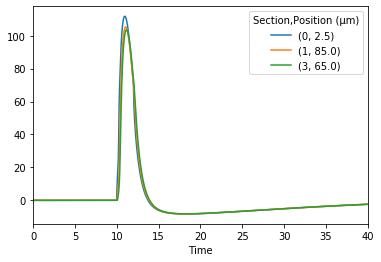

In [12]:
sim.V.loc[:,0::10].plot()

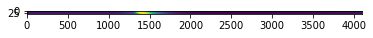

In [71]:
plt.imshow(sim.V.T)